## **IndiGo Airline Data Analysis Project**
###### Designed & Developed by Vineet Kumar

#### ****Install required libraries****

In [1]:
!pip install pandas numpy matplotlib seaborn

#### ****Import libraries****

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

### ***Section-1 Dataset Overview and Basic Analysis***

#### ****1. Load the dataset****

In [6]:
df = pd.read_csv('IndiGo_Airline_Dataset.csv')
df.head()

,PassengerID,Name,Age,Gender,From,To,DateOfJourney,DepartureTime,ArrivalTime,FlightNumber,SeatClass,TicketPrice,Duration,Delay,Status
0,1,Aryan Maharaj,58,Male,Delhi,Chennai,2025-03-16,07:15,09:15,6E792,First,11935,2h 0m,0,Rescheduled
1,2,Liam Chaudry,45,Male,Delhi,Mumbai,2025-08-30,06:15,11:15,6E674,Economy,14731,5h 0m,120,Cancelled
2,3,Pahal Balay,32,Female,Jaipur,Kolkata,2024-12-22,00:15,04:45,6E384,Economy,6527,4h 30m,30,Completed
3,4,Tejas Kaul,23,Female,Bengaluru,Goa,2025-06-25,11:30,13:15,6E649,Economy,9201,1h 45m,0,Rescheduled
4,5,Rushil Saini,36,Female,Jaipur,Hyderabad,2025-03-06,22:00,23:15,6E891,Business,4307,1h 15m,15,Completed


#### ****2. Check dataset shape (rows, columns)****

In [8]:
df.shape

(1000, 15)

#### ****3. Get dataset info (datatypes & non-null counts)****

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PassengerID    1000 non-null   int64 
 1   Name           1000 non-null   object
 2   Age            1000 non-null   int64 
 3   Gender         1000 non-null   object
 4   From           1000 non-null   object
 5   To             1000 non-null   object
 6   DateOfJourney  1000 non-null   object
 7   DepartureTime  1000 non-null   object
 8   ArrivalTime    1000 non-null   object
 9   FlightNumber   1000 non-null   object
 10  SeatClass      1000 non-null   object
 11  TicketPrice    1000 non-null   int64 
 12  Duration       1000 non-null   object
 13  Delay          1000 non-null   int64 
 14  Status         1000 non-null   object
dtypes: int64(4), object(11)
memory usage: 117.3+ KB


#### ****4. Summary statistics for numeric columns****

In [10]:
df.describe()

,PassengerID,Age,TicketPrice,Delay
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,48.902000,9177.913000,45.810000
std,288.819436,17.713446,3521.743073,43.457248
min,1.000000,18.000000,3000.000000,0.000000
25%,250.750000,33.750000,6235.000000,15.000000
50%,500.500000,48.000000,9202.500000,30.000000
75%,750.250000,64.000000,12274.000000,60.000000
max,1000.000000,80.000000,15000.000000,120.000000


#### ****5. Summary statistics for categorical columns****

In [11]:
df.describe(include='object')

,Name,Gender,From,To,DateOfJourney,DepartureTime,ArrivalTime,FlightNumber,SeatClass,Duration,Status
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,979,2,10,10,343,96,96,590,3,20,3
top,Unknown Passenger,Male,Pune,Mumbai,2025-03-18,23:00,03:15,6E810,Economy,1h 30m,Rescheduled
freq,20,511,113,110,7,18,20,6,341,63,347


#### ****6. Check for missing values****

In [12]:
df.isna().sum()

PassengerID      0
Name             0
Age              0
Gender           0
From             0
To               0
DateOfJourney    0
DepartureTime    0
ArrivalTime      0
FlightNumber     0
SeatClass        0
TicketPrice      0
Duration         0
Delay            0
Status           0
dtype: int64

#### ****7. Check for duplicates****

In [13]:
df.duplicated().sum()

np.int64(0)

### ***Section-2 Passenger Demographics Analysis***

#### ****8. Count of passengers by gender****

In [14]:
df['Gender'].value_counts()

Gender
Male      511
Female    489
Name: count, dtype: int64

#### ****9. Percentage of each gender****

In [15]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      51.1
Female    48.9
Name: proportion, dtype: float64

#### ****10. Age statistics****

In [16]:
df['Age'].describe()

count    1000.000000
mean       48.902000
std        17.713446
min        18.000000
25%        33.750000
50%        48.000000
75%        64.000000
max        80.000000
Name: Age, dtype: float64

#### ****11. Plot histogram of passenger ages****

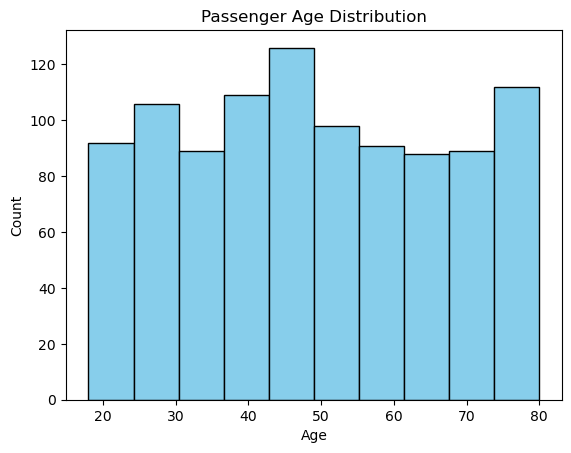

In [17]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### ****12. Boxplot of age by gender****

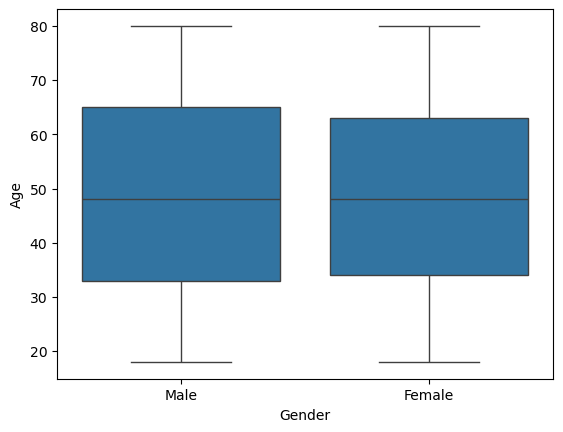

In [18]:
import seaborn as sns
sns.boxplot(x='Gender', y='Age', data=df)
plt.show()

#### ****13. Average age by gender****

In [19]:
df.groupby('Gender')['Age'].mean()

Gender
Female    48.433538
Male      49.350294
Name: Age, dtype: float64

### ***Section-3 Flight Route Analysis***

#### ****14. Most popular source cities****

In [20]:
df['From'].value_counts()

From
Pune         113
Ahmedabad    110
Goa          105
Mumbai       102
Jaipur        98
Delhi         97
Kolkata       97
Bengaluru     96
Chennai       95
Hyderabad     87
Name: count, dtype: int64

#### ****15. Most popular destination cities****

In [21]:
df['To'].value_counts()

To
Mumbai       110
Jaipur       109
Pune         107
Hyderabad    107
Ahmedabad    101
Kolkata      101
Goa           97
Bengaluru     96
Delhi         89
Chennai       83
Name: count, dtype: int64

#### ****16. Most frequent flight route (From → To)****

In [22]:
df.groupby(['From','To']).size().sort_values(ascending=False).head(10)

From       To       
Ahmedabad  Delhi        17
Pune       Ahmedabad    17
Ahmedabad  Mumbai       16
Chennai    Jaipur       16
Goa        Mumbai       16
Ahmedabad  Goa          16
Pune       Jaipur       16
Kolkata    Hyderabad    16
Chennai    Pune         15
Mumbai     Goa          15
dtype: int64

#### ****17. Plot top 10 routes using bar plot****

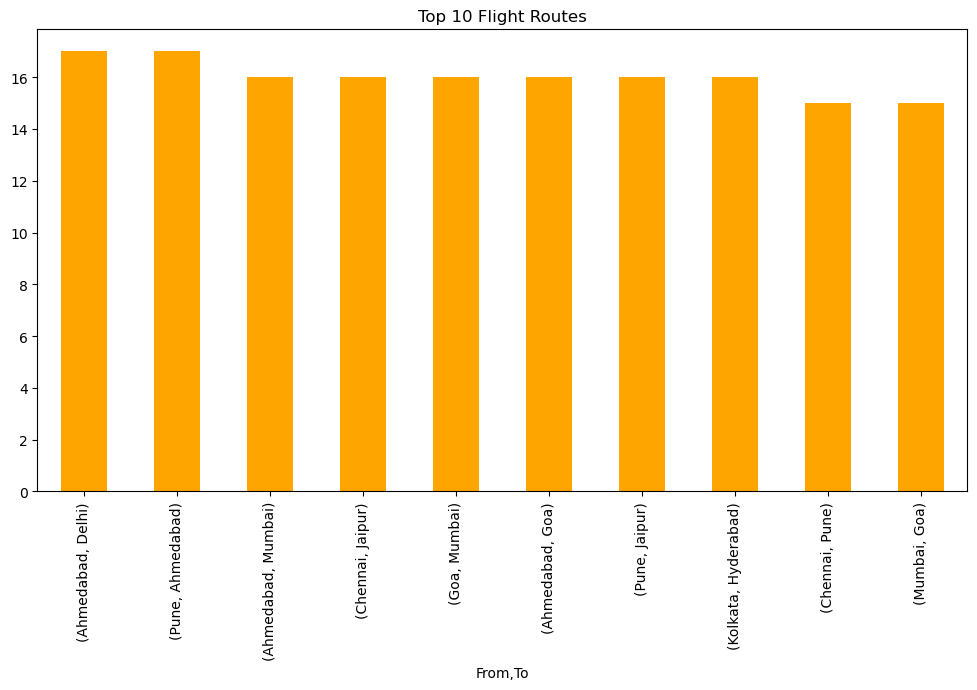

In [23]:
top_routes = df.groupby(['From','To']).size().sort_values(ascending=False).head(10)
top_routes.plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Top 10 Flight Routes')
plt.show()

#### ****18. Number of unique flights****

In [24]:
df['FlightNumber'].nunique()

590

### ***Section-4 Flight Date & Time Analysis***

#### ****19. Convert DateOfJourney to datetime****

In [30]:
df['DateOfJourney'] = pd.to_datetime(df['DateOfJourney'])
df.head(2)

,PassengerID,Name,Age,Gender,From,To,DateOfJourney,DepartureTime,ArrivalTime,FlightNumber,SeatClass,TicketPrice,Duration,Delay,Status
0,1,Aryan Maharaj,58,Male,Delhi,Chennai,2025-03-16,07:15,09:15,6E792,First,11935,2h 0m,0,Rescheduled
1,2,Liam Chaudry,45,Male,Delhi,Mumbai,2025-08-30,06:15,11:15,6E674,Economy,14731,5h 0m,120,Cancelled


#### ****20. Number of flights per month****

In [31]:
df['Month'] = df['DateOfJourney'].dt.month
df['Month'].value_counts().sort_index()

Month
1      77
2      71
3      79
4     100
5      89
6      76
7      75
8      96
9      83
10    104
11     77
12     73
Name: count, dtype: int64

#### ****21. Plot flights per month****

C:\Users\vinee\AppData\Local\Temp\ipykernel_10672\1299413657.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis')


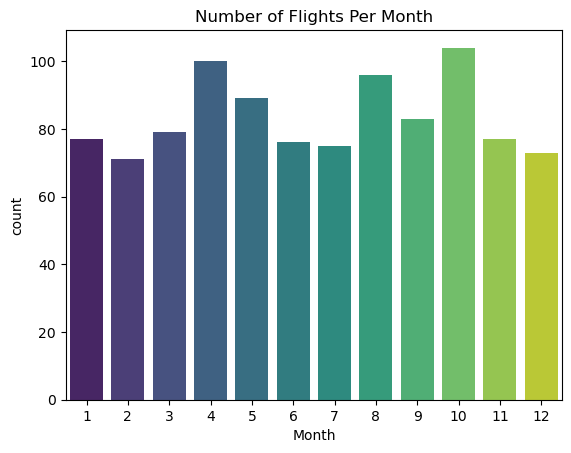

In [32]:
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Number of Flights Per Month')
plt.show()

#### ****22. Most common departure hour****

In [33]:
df['DepartureHour'] = df['DepartureTime'].str.split(':').str[0].astype(int)
df['DepartureHour'].value_counts().sort_index()

DepartureHour
0     43
1     39
2     38
3     37
4     42
5     43
6     33
7     44
8     42
9     48
10    39
11    46
12    48
13    43
14    50
15    38
16    48
17    37
18    41
19    36
20    51
21    33
22    40
23    41
Name: count, dtype: int64

#### ****23. Plot departure time distribution****

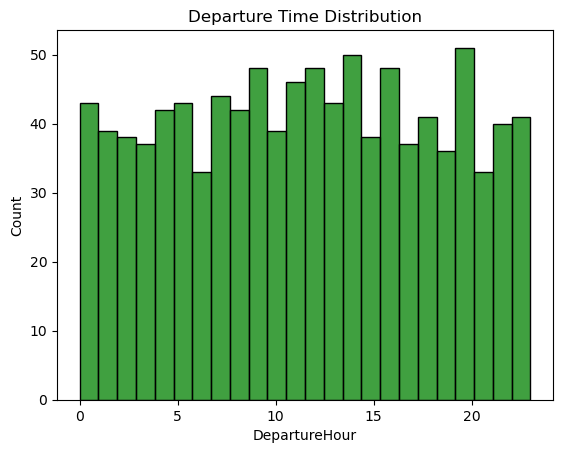

In [34]:
sns.histplot(df['DepartureHour'], bins=24, color='green')
plt.title('Departure Time Distribution')
plt.show()

### ***Section-5 Flight Duration and Delay Analysis***

#### ****24. Convert duration to total minutes****

In [37]:
df['DurationMinutes'] = df['Duration'].str.replace('h','').str.replace('m','').str.split()
df['DurationMinutes'] = df['DurationMinutes'].apply(lambda x: int(x[0])*60 + int(x[1]))
df.head(2)

,PassengerID,Name,Age,Gender,From,To,DateOfJourney,DepartureTime,ArrivalTime,FlightNumber,SeatClass,TicketPrice,Duration,Delay,Status,Month,DepartureHour,DurationMinutes
0,1,Aryan Maharaj,58,Male,Delhi,Chennai,2025-03-16,07:15,09:15,6E792,First,11935,2h 0m,0,Rescheduled,3,7,120
1,2,Liam Chaudry,45,Male,Delhi,Mumbai,2025-08-30,06:15,11:15,6E674,Economy,14731,5h 0m,120,Cancelled,8,6,300


#### ****25. Average flight duration****

In [38]:
df['DurationMinutes'].mean()

np.float64(199.905)

#### ****26. Maximum and minimum duration****

In [39]:
df['DurationMinutes'].max(), df['DurationMinutes'].min()

(345, 60)

#### ****27. Plot flight duration distribution****

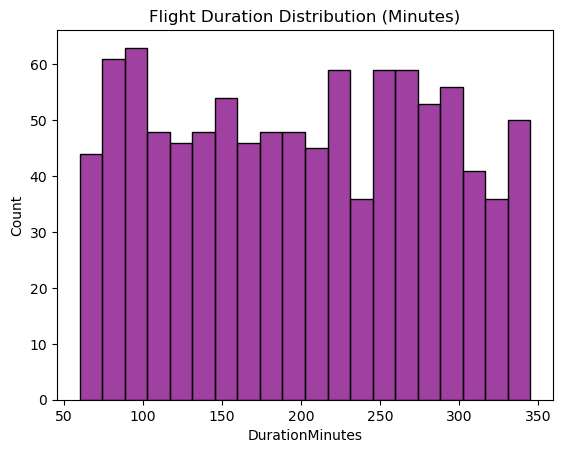

In [40]:
sns.histplot(df['DurationMinutes'], bins=20, color='purple')
plt.title('Flight Duration Distribution (Minutes)')
plt.show()

#### ****28. Average delay per flight****

In [41]:
df['Delay'].mean()

np.float64(45.81)

#### ****29. Number of delayed flights (>0 minutes)****

In [42]:
(df['Delay']>0).sum()

np.int64(786)

#### ****30. Plot delay distribution****

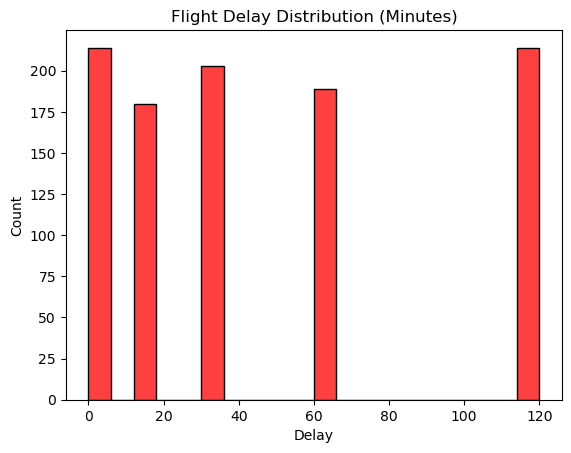

In [43]:
sns.histplot(df['Delay'], bins=20, color='red')
plt.title('Flight Delay Distribution (Minutes)')
plt.show()

### ***Section-6 Ticket Price Analysis***

#### ****31. Ticket price statistics****

In [44]:
df['TicketPrice'].describe()

count     1000.000000
mean      9177.913000
std       3521.743073
min       3000.000000
25%       6235.000000
50%       9202.500000
75%      12274.000000
max      15000.000000
Name: TicketPrice, dtype: float64

#### ****32. Average ticket price by seat class****

In [45]:
df.groupby('SeatClass')['TicketPrice'].mean()

SeatClass
Business    9326.359756
Economy     8958.085044
First       9257.280967
Name: TicketPrice, dtype: float64

#### ****33. Box plot of ticket price by seat class****

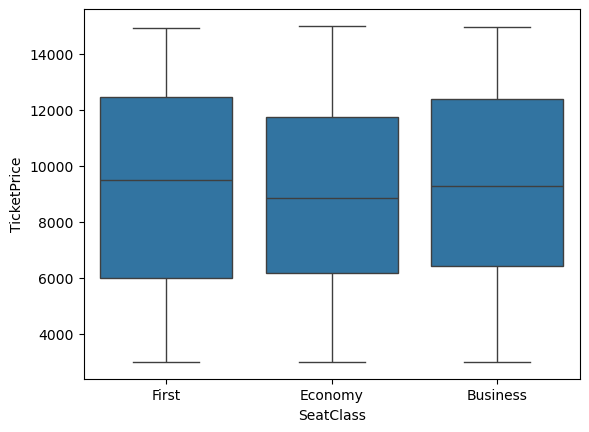

In [47]:
sns.boxplot(x='SeatClass', y='TicketPrice', data=df)
plt.show()

#### ****34. Top 5 most expensive flights****

In [48]:
df.nlargest(5, 'TicketPrice')[['FlightNumber','From','To','TicketPrice']]

,FlightNumber,From,To,TicketPrice
276,6E891,Jaipur,Hyderabad,15000
332,6E646,Goa,Pune,14971
108,6E508,Goa,Ahmedabad,14953
991,6E798,Delhi,Goa,14932
796,6E851,Ahmedabad,Jaipur,14921


#### ****35. Correlation between ticket price and delay****

In [49]:
df[['TicketPrice','Delay']].corr()

,TicketPrice,Delay
TicketPrice,1.000000,0.046038
Delay,0.046038,1.000000


### ***Section-7 Flight Status Analysis***

#### ****36.Number of flights by status****

In [50]:
df['Status'].value_counts()

Status
Rescheduled    347
Completed      343
Cancelled      310
Name: count, dtype: int64

#### ****37. Percentage of flights completed, cancelled, rescheduled****

In [51]:
df['Status'].value_counts(normalize=True)*100

Status
Rescheduled    34.7
Completed      34.3
Cancelled      31.0
Name: proportion, dtype: float64

#### ****38. Plot flight status distribution****

C:\Users\vinee\AppData\Local\Temp\ipykernel_10672\3916297495.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')


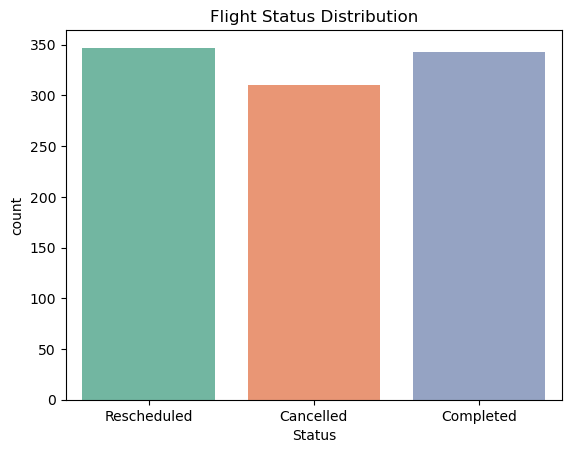

In [52]:
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Flight Status Distribution')
plt.show()

### ***Section-8 Advanced Analysis with NumPy & Statistics***

#### ****39. Average, median, and mode of ticket price****

In [53]:
np.mean(df['TicketPrice']), np.median(df['TicketPrice']), stats.mode(df['TicketPrice'])

(np.float64(9177.913), np.float64(9202.5), 7505)

#### ****40. Standard deviation of flight duration****

In [54]:
np.std(df['DurationMinutes'])

86.20508091174223

#### ****41. Variance of delays****

In [55]:
np.var(df['Delay'])

1886.6439000000066

#### ****42. Skewness of ticket prices****

In [56]:
df['TicketPrice'].skew()

np.float64(-0.063299195109509)

#### ****43. Kurtosis of ticket prices****

In [57]:
df['TicketPrice'].kurt()

np.float64(-1.2097979512483992)

### ***Section-9 Exploratory Data Analysis (EDA) Visualizations***

#### ****44. Pairplot for numeric columns****

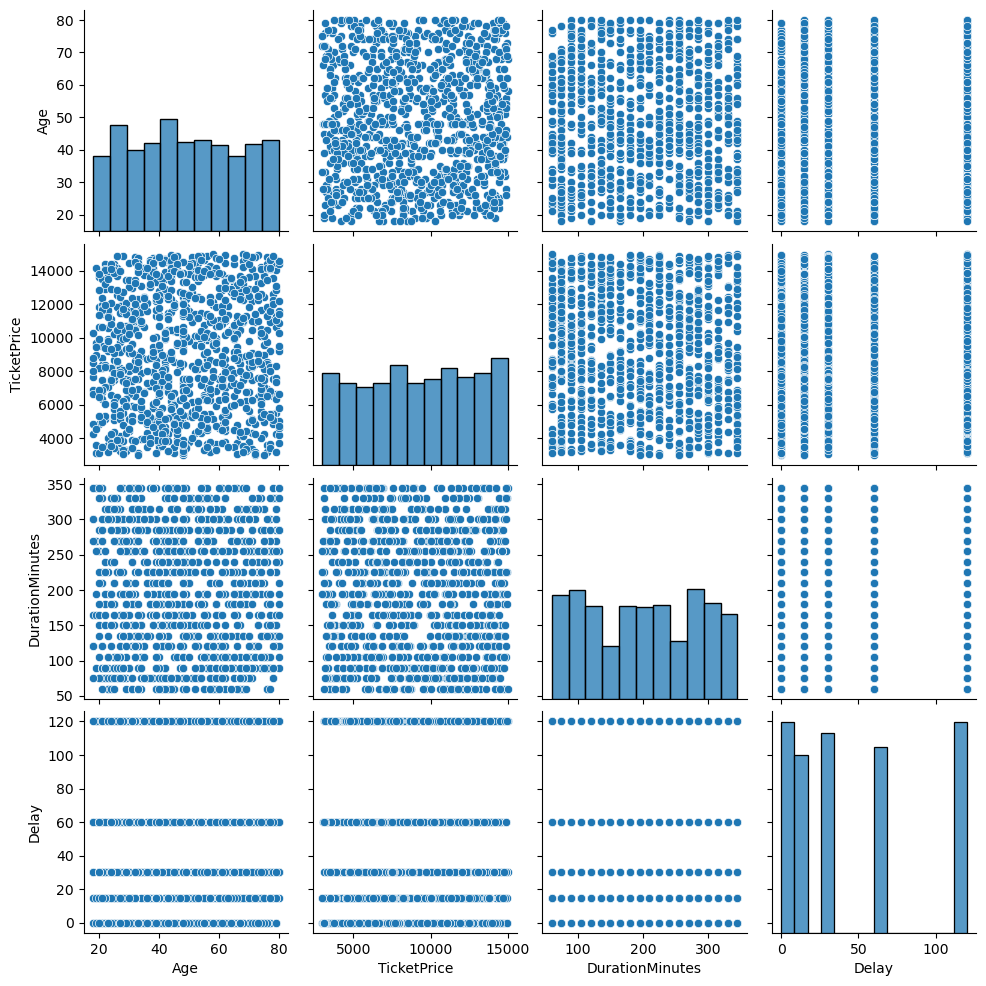

In [58]:
sns.pairplot(df[['Age','TicketPrice','DurationMinutes','Delay']])
plt.show()

#### ****45. Correlation heatmap****

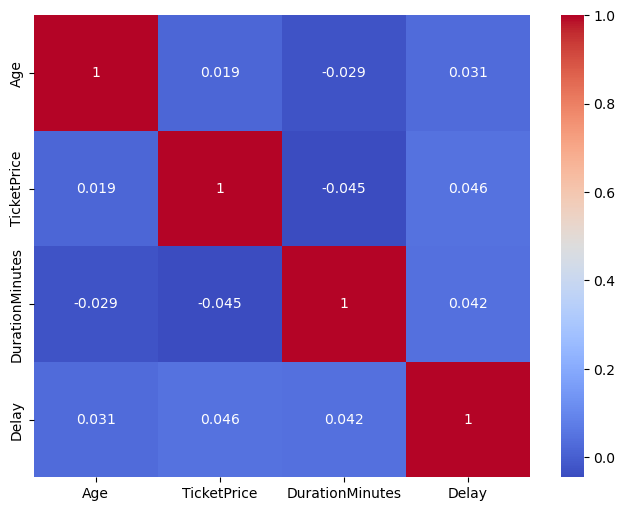

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','TicketPrice','DurationMinutes','Delay']].corr(), annot=True, cmap='coolwarm')
plt.show()

#### ****46. Top 10 busiest routes by passenger count****

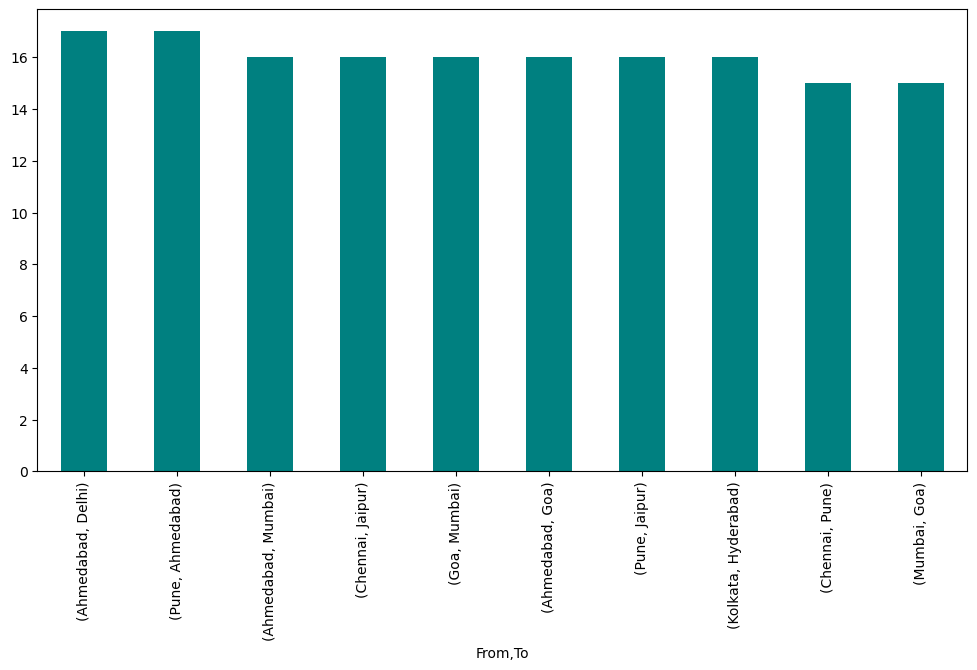

In [60]:
top_routes = df.groupby(['From','To']).size().sort_values(ascending=False).head(10)
top_routes.plot(kind='bar', figsize=(12,6), color='teal')
plt.show()

#### ****47. Ticket price vs duration scatter plot****

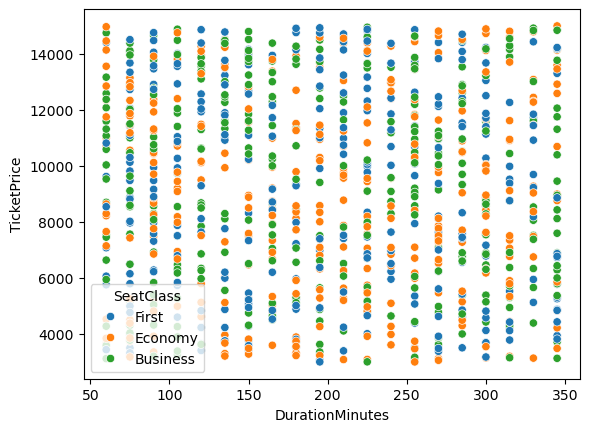

In [61]:
sns.scatterplot(x='DurationMinutes', y='TicketPrice', data=df, hue='SeatClass')
plt.show()

#### ****48. Delay vs departure hour scatter plot****

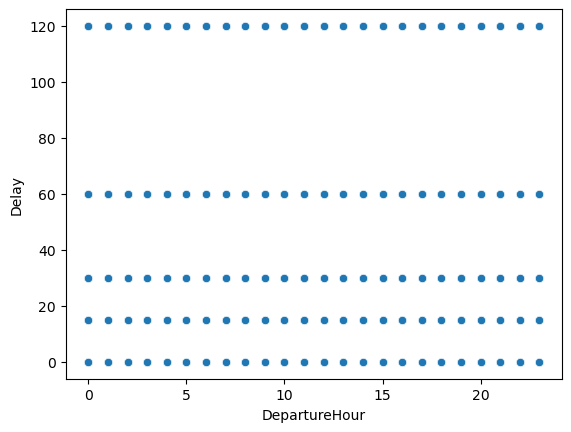

In [62]:
sns.scatterplot(x='DepartureHour', y='Delay', data=df)
plt.show()

#### ****49. Boxplot of delay by seat class****

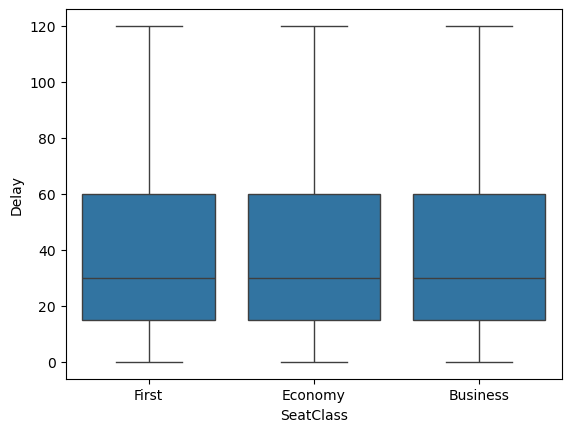

In [63]:
sns.boxplot(x='SeatClass', y='Delay', data=df)
plt.show()

#### ****50. Histogram of ticket prices****

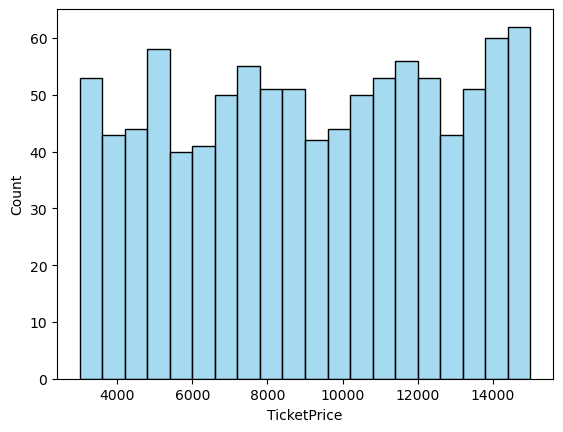

In [64]:
sns.histplot(df['TicketPrice'], bins=20, color='skyblue')
plt.show()

### ***Section-10 Passenger Insights***

#### ****51. Top 10 oldest passengers****

In [65]:
df.nlargest(10,'Age')[['Name','Age','From','To']]

,Name,Age,From,To
143,Rajata Sunder,80,Bengaluru,Jaipur
217,Bhavya Rattan,80,Ahmedabad,Delhi
340,Abhimanyu Jayaraman,80,Chennai,Pune
350,Hitesh Kohli,80,Delhi,Jaipur
395,Bhavani Chacko,80,Kolkata,Bengaluru
570,Saumya Purohit,80,Delhi,Ahmedabad
667,Pranit Bala,80,Kolkata,Hyderabad
699,Ijaya Pandey,80,Mumbai,Hyderabad
716,Amrita Peri,80,Delhi,Bengaluru
745,Vivaan Sanghvi,80,Bengaluru,Mumbai


#### ****52. Top 10 youngest passengers****

In [66]:
df.nsmallest(10,'Age')[['Name','Age','From','To']]

,Name,Age,From,To
140,Lajita Sood,18,Delhi,Chennai
341,Laksh Kumer,18,Bengaluru,Mumbai
352,Harinakshi Kant,18,Jaipur,Kolkata
500,Xiti Baria,18,Delhi,Ahmedabad
541,Tara Kurian,18,Bengaluru,Delhi
586,Prisha Tandon,18,Kolkata,Ahmedabad
590,Umang Mital,18,Chennai,Goa
661,Lajita Narayan,18,Delhi,Ahmedabad
834,Pooja Gera,18,Goa,Hyderabad
221,Odika Bhagat,19,Pune,Ahmedabad


#### ****53. Average age per seat class****

In [67]:
df.groupby('SeatClass')['Age'].mean()

SeatClass
Business    49.414634
Economy     48.847507
First       48.450151
Name: Age, dtype: float64

#### ****54. Passenger count per route****

In [68]:
df.groupby(['From','To']).size()

From       To       
Ahmedabad  Bengaluru     8
           Chennai      10
           Delhi        17
           Goa          16
           Hyderabad    12
                        ..
Pune       Goa          12
           Hyderabad    11
           Jaipur       16
           Kolkata      12
           Mumbai        9
Length: 90, dtype: int64

#### ****55. Passengers with highest delays****

In [69]:
df.nlargest(10,'Delay')[['Name','From','To','Delay']]

,Name,From,To,Delay
1,Liam Chaudry,Delhi,Mumbai,120
12,Chakradev Kari,Ahmedabad,Mumbai,120
14,Lajita Mall,Bengaluru,Ahmedabad,120
17,Yash Gade,Chennai,Bengaluru,120
22,Meghana Shanker,Kolkata,Pune,120
24,Priya Rastogi,Hyderabad,Pune,120
39,Jeremiah Dave,Jaipur,Kolkata,120
52,Raagini Pandya,Hyderabad,Delhi,120
57,Arya Shere,Chennai,Hyderabad,120
59,Unknown Passenger,Ahmedabad,Delhi,120


### ***Section-11 Seasonal and Monthly Analysis***

#### ****56. Flights per month by status****

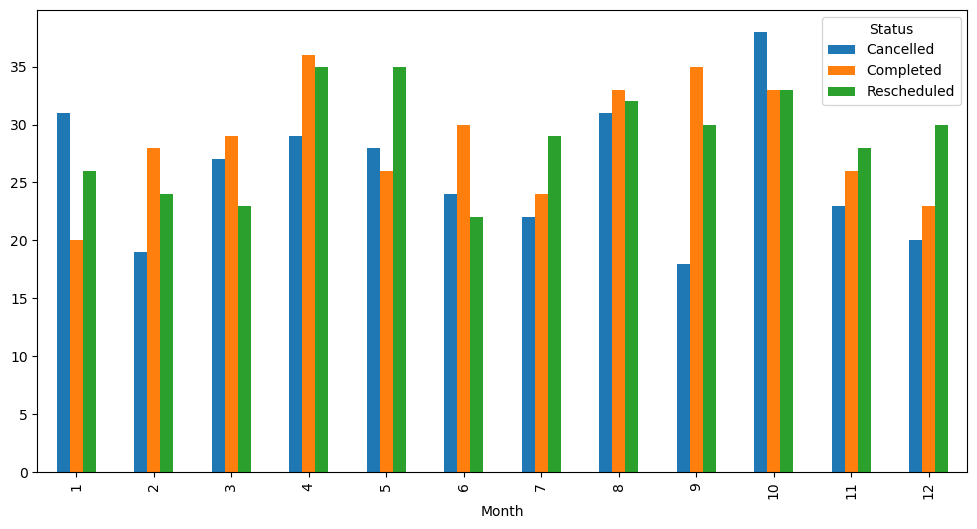

In [70]:
df.groupby(['Month','Status']).size().unstack().plot(kind='bar', figsize=(12,6))
plt.show()

#### ****57. Average ticket price per month****

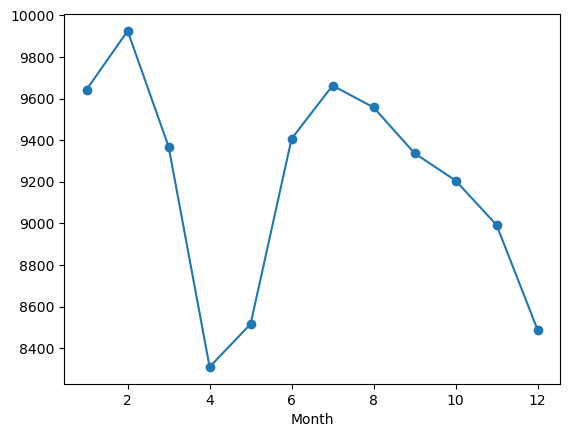

In [71]:
df.groupby('Month')['TicketPrice'].mean().plot(kind='line', marker='o')
plt.show()

#### ****58. Average delay per month****

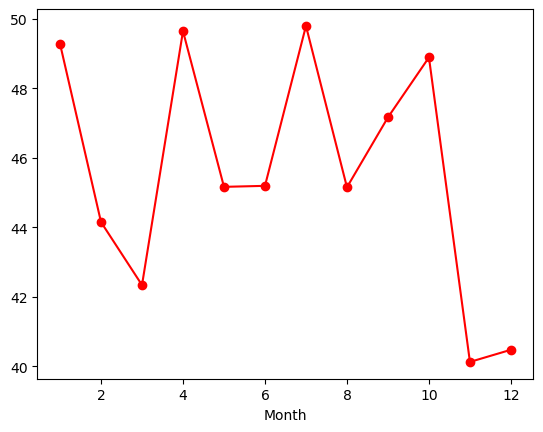

In [72]:
df.groupby('Month')['Delay'].mean().plot(kind='line', marker='o', color='red')
plt.show()